## Topics to be covered


## [0. Install](#0)


## [1. Contours](#1)
    - 1. What are contours
    - 2. Applications of contours
    - 3. Contour detection using opencv
    - 4. Contour properties -> How contours are different from edges
    

## [2. Project - Find extreme points in image containing hand](#2)


## [3. Project - Contour based shape detection](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# Select the requirements file as per OS and CUDA version or CPU version
!cd monk_v1/installation/Linux && pxip install -r requirements_cu9.txt

In [1]:
# Imports
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
%matplotlib inline

<a id='1'></a>
# Contours

## Image Contours

In [3]:
print("Use slider to change slides")
# Slide section 1
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=1, min=1, max=4);

def f(slide_num):
    img_name = "imgs/chapter6/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=1, description='slide_num', max=4, min=1), Output()), _dom_classes=('wid…

## 2. Contour detection using opencv

In [7]:
# Detecting contours using opencv

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter6/tessellate.png", 1);


# Write a function to convert img from BGR to Grayscale
imgray = 

In [16]:
thresh = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

In [17]:
#ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);


In [18]:
# drawing contours over blank image
ctr = np.zeros(img.shape, dtype=np.uint8);
cv2.drawContours(ctr, contours, -1, (0,255,0), 3);

# drawing contours over original image
img_with_contours = img.copy();
cv2.drawContours(img_with_contours, contours, -1, (0,255,0), 3); # Talk about (0, 255, 0) colors

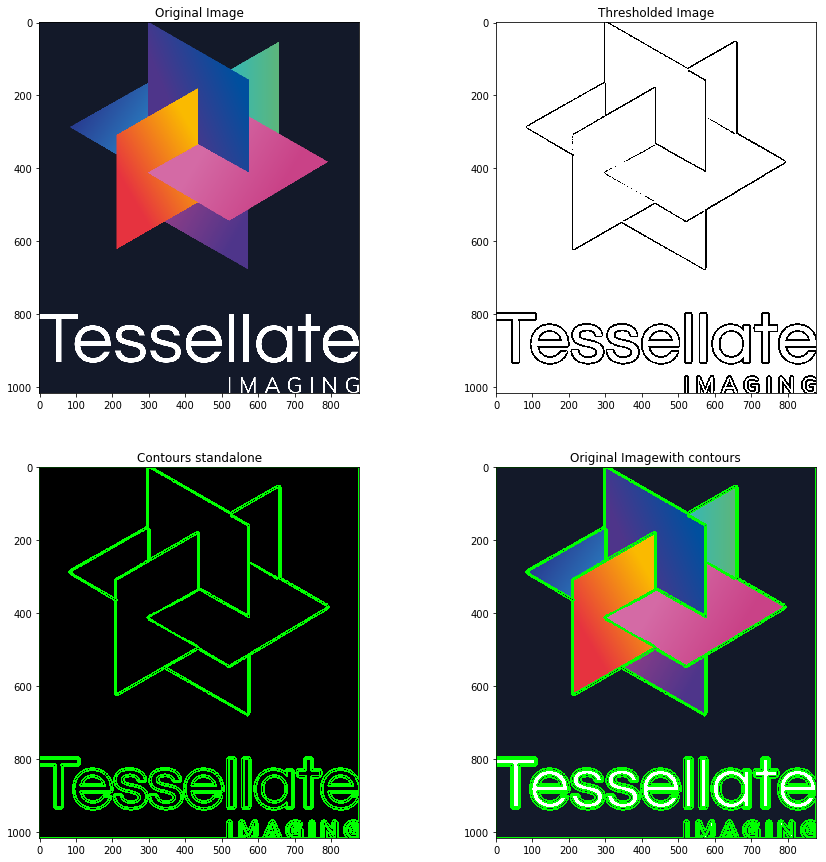

In [19]:
f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('Original Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('Thresholded Image');
plt.imshow(thresh, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Contours standalone');
plt.imshow(ctr[:,:,::-1]);
f.add_subplot(2, 2, 4).set_title('Original Imagewith contours');
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

In [2]:
# Interactive demo - 1
# Understanding the approximations
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np
lst = [cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE, cv2.CHAIN_APPROX_TC89_L1, cv2.CHAIN_APPROX_TC89_KCOS]
sl1 = widgets.SelectionSlider(value=cv2.CHAIN_APPROX_SIMPLE, options=lst);

def f(contour_approx):
    img = cv2.imread("imgs/chapter6/castle.png", 1);
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
    thresh = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    #ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,contour_approx);

    ctr = np.zeros(img.shape, dtype=np.uint8);
    cv2.drawContours(img, contours, -1, (0,255,0), 1);
    
    plt.figure(figsize=(15, 15));
    plt.imshow(img[:,:,::-1], cmap = "gray")
    plt.show()

interact(f, contour_approx=sl1);

interactive(children=(SelectionSlider(description='contour_approx', index=1, options=(1, 2, 3, 4), value=2), O…

# Retrieval methods

 - CV_RETR_EXTERNAL gives "outer" contours, so if you have (say) one contour enclosing another (like concentric circles), only the outermost is given.
 
- CV_RETR_LIST gives all the contours and doesn't even bother calculating the hierarchy -- good if you only want the contours and don't care whether one is nested inside another.

- CV_RETR_CCOMP gives contours and organises them into outer and inner contours. Every contour is either the outline of an object, or the outline of an object inside another object (i.e. hole). The hierarchy is adjusted accordingly. This can be useful if (say) you want to find all holes.

 - CV_RETR_TREE calculates the full hierarchy of the contours. So you can say that object1 is nested 4 levels deep within object2 and object3 is also nested 4 levels deep.

## Contour properties
    - 1. Contour Moments
    - 2. Contour Area -> Area Enclosed inside a closed contour in pixels
    - 3. Contour Perimeter - Number of pixels a contour covers in pixels
    - 4. Contour approximation
        - Approximating the shape of a contour from an irregular shape
    - 5. Convex Hull
    - 6. Bounding rectangle, cicle, eclipse fitting accross a contour

### Contour Moments
    - Moments are a set of statistical parameters to measure a distribution. 
    - Three moments are commonly used: 
        - 1st, Mean: the average. 
        - 2d, Variance: an indication of how closely the values are spread about the mean.
        - 3rd, Standard deviation is the square root of the variance

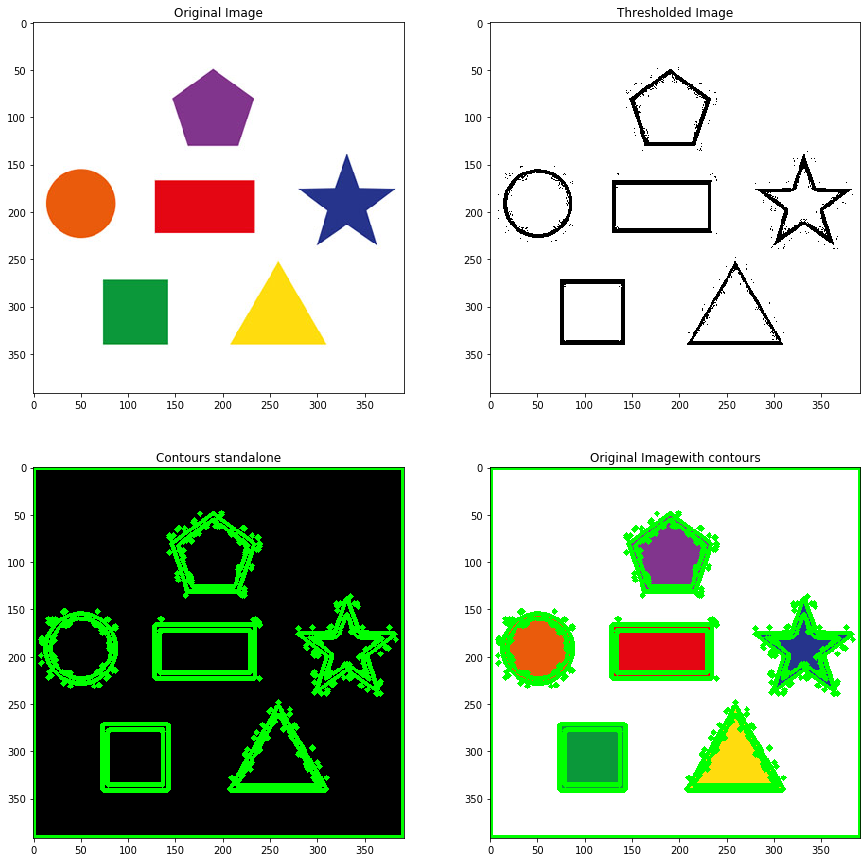

In [7]:
# Detecting contours

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter6/shape.jpg", 1);

# STEP -1 Convert img from BGR Space to Grayscale space
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);


thresh = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)


# Write function to find contours
# - Retrieval - TREE
# - Approximation - Simple
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);

# drawing contours over blank image
ctr = np.zeros(img.shape, dtype=np.uint8);
cv2.drawContours(ctr, contours, -1, (0,255,0), 3);

# drawing contours over original image
img_with_contours = img.copy();
cv2.drawContours(img_with_contours, contours, -1, (0,255,0), 3); # Talk about (0, 255, 0) colors

f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('Original Image');
plt.imshow(img[:,:,::-1]);
f.add_subplot(2, 2, 2).set_title('Thresholded Image');
plt.imshow(thresh, cmap="gray");
f.add_subplot(2, 2, 3).set_title('Contours standalone');
plt.imshow(ctr[:,:,::-1]);
f.add_subplot(2, 2, 4).set_title('Original Imagewith contours');
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

In [8]:
print("Number of contours = {}".format(len(contours)));

Number of contours = 262


In [ ]:
# Interactive demo - 1
# Trying to isolate valid contours

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


sl1 = widgets.IntSlider(value=109, min=0, max=len(contours));

def f(contour_num):
    img = cv2.imread("imgs/chapter6/shape.jpg", 1);
    ctr = np.zeros(img.shape, dtype=np.uint8);
    cv2.drawContours(ctr, contours, contour_num, (0,255,0), 3);
    cv2.drawContours(img, contours, contour_num, (0,255,0), 3);
    
    f = plt.figure(figsize=(15,15))
    f.add_subplot(1, 2, 1).set_title('Contour Image');
    plt.imshow(ctr[:,:,::-1]);
    f.add_subplot(1, 2, 2).set_title('Contour on original Image');
    plt.imshow(img[:,:,::-1]);

interact(f, contour_num=sl1);

### Image moments
    - Image moments help you to calculate some features like center of mass of the object, area of the object etc. 
    

In [10]:
# Contour Moments
cnt = contours[109] # Change value and check
M = cv2.moments(cnt)
print(M)

{'m00': 6045.0, 'm10': 1094411.3333333333, 'm01': 1175752.5, 'm20': 203802623.5, 'm11': 212863004.3333333, 'm02': 230321857.0, 'm30': 38948835638.6, 'm21': 39639610270.75, 'm12': 41698529210.45, 'm03': 45434781533.25, 'mu20': 5665954.099099368, 'mu11': 0.0, 'mu02': 1637995.75, 'mu30': 6907.108200073242, 'mu21': -9.5367431640625e-07, 'mu12': 125469.31198167801, 'mu03': 0.0, 'nu20': 0.15505309569186074, 'nu11': 0.0, 'nu02': 0.04482498575270527, 'nu30': 2.4311149628899743e-06, 'nu21': -3.3566752296055203e-16, 'nu12': 4.416179867269681e-05, 'nu03': 0.0}


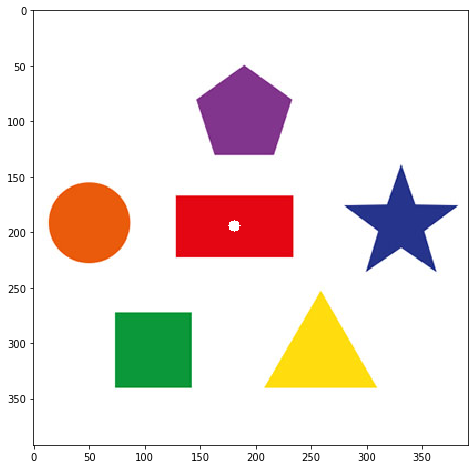

In [11]:
# Using some moments to find centroid of an object
# We selected 110th contour which represents the rectangle
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cv2.circle(img,(int(cx), int(cy)), 5, (255,255,255), -1)

plt.figure(figsize=(8, 8));
plt.imshow(img[:,:,::-1]);
plt.show();

### Contour Area

In [12]:
# Contour Area
cnt = contours[109]
area = cv2.contourArea(cnt)
print(area)

6045.0


In [13]:
# List of areas of all contours
lst_arr = [];
for cnt in contours:
    lst_arr.append(cv2.contourArea(cnt))

print("Minimum area = {}".format(min(lst_arr)));
print("Maximum area = {}".format(max(lst_arr)));

Minimum area = 0.0
Maximum area = 152881.0


In [14]:
print(lst_arr)

[152881.0, 2.0, 4.0, 2.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 4898.0, 3420.5, 2.0, 5.5, 2.0, 2.0, 2.0, 4644.0, 0.0, 3315.5, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 5.5, 4.0, 7.0, 4.0, 4.0, 4.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 15.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6045.0, 4316.0, 2.0, 4.0, 2.0, 2.0, 5.5, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.5, 2.0, 2.0, 2.0, 2.0, 4301.5, 0.0, 0.0, 3155.5, 2.0, 7.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 2.0, 4.0, 4.0, 5.5, 7.5, 4.0, 2.0, 7.5, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3598.5, 0.0, 0.0, 1803.5, 4.0, 2.0, 5.5, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0

In [15]:
# Interactive demo - 2
# Removing contours as per their areas

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


sl1 = widgets.IntText(value=0, description='Minimum area:')

def f(threshold):
    img = cv2.imread("imgs/chapter6/shape.jpg", 1);
    for i in range(len(contours)):
        if(lst_arr[i] > threshold):
            cv2.drawContours(img, contours, i, (0,255,0), 3);
    plt.figure(figsize=(8, 8));
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, threshold=sl1);

#Check these values
#0-14
#4000
#4600
#4900
#5000

interactive(children=(IntText(value=0, description='Minimum area:'), Output()), _dom_classes=('widget-interact…

### Contour Perimeter

In [16]:
# Contour Perimeter
cnt = contours[109]
perimeter = cv2.arcLength(cnt, True) # True -> closed length
print(perimeter)


326.48528122901917


In [17]:
# List of perimeters of all contours
lst_per = [];
for cnt in contours:
    lst_per.append(cv2.arcLength(cnt, True))

print("Minimum perimeter = {}".format(min(lst_per)));
print("Maximum perimeter = {}".format(max(lst_per)));

Minimum perimeter = 0.0
Maximum perimeter = 1564.0


In [18]:
# Interactive demo - 2
# Filtering contours as per their lengths

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


sl1 = widgets.IntText(value=0, description='Minimum area:')

def f(threshold):
    img = cv2.imread("imgs/chapter6/shape.jpg", 1);
    for i in range(len(contours)):
        if(lst_per[i] > threshold):
            cv2.drawContours(img, contours, i, (0,255,0), 3);
    plt.figure(figsize=(8, 8));
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, threshold=sl1);

#Check these values
#0-14
#270
#290
#310
#330
# Star has minimum area but maximum contour length

interactive(children=(IntText(value=0, description='Minimum area:'), Output()), _dom_classes=('widget-interact…

### Contour Approximation based on length

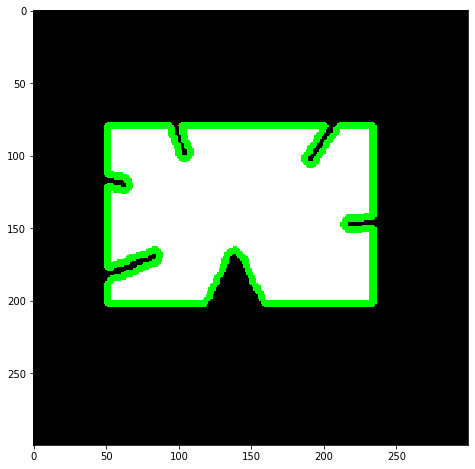

In [20]:
# Contour Approximation

%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter6/contours.jpg", 0);




thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)



contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);


# drawing contours over original image
img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.drawContours(img_with_contours, contours, 6, (0,255,0), 3); # Talk about (0, 255, 0) colors


plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()







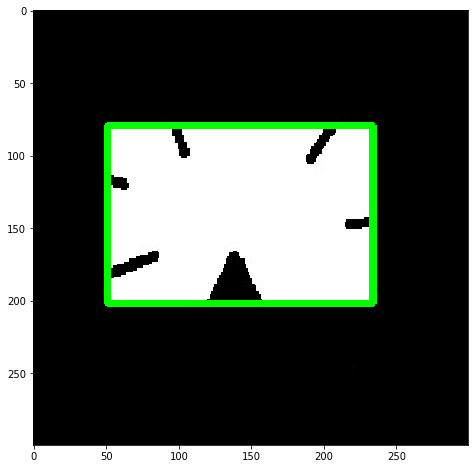

In [21]:
# approximation
cnt = contours[6]
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

# drawing contours over original image
img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.drawContours(img_with_contours, [approx], 0, (0,255,0), 3); # Talk about (0, 255, 0) colors


plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

## Contour Approximation

In [5]:
# Interactive demo - 3
# Contour approximation value

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


sl1 = widgets.FloatSlider(value=0.00, min=0.00, max=0.04, step=0.01)

def f(scale):
    
    img = cv2.imread("imgs/chapter6/contours.jpg", 0);
    thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);
    
    cnt = contours[6]
    epsilon = scale*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)

    # drawing contours over original image
    img_with_contours = img.copy();
    img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
    cv2.drawContours(img_with_contours, [approx], 0, (0,255,0), 3); # Talk about (0, 255, 0) colors
    
    
    plt.figure(figsize=(8, 8));
    plt.imshow(img_with_contours[:,:,::-1])
    plt.show()

interact(f, scale=sl1);

interactive(children=(FloatSlider(value=0.0, description='scale', max=0.04, step=0.01), Output()), _dom_classe…

In [ ]:
# len(approx) gives the number of vertices in the approximated contour shape

In [23]:
len(approx)

4

### Convex Hull

In [24]:
print("Use slider to change slides")
# Slide section 2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=5, min=5, max=5);

def f(slide_num):
    img_name = "imgs/chapter6/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=5, description='slide_num', max=5, min=5), Output()), _dom_classes=('wid…

In [26]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter6/contours.jpg", 0);

thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);

In [27]:
# create hull array for convex hull points
hull = []
 
# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))

In [28]:
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
 
# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv2.drawContours(drawing, hull, i, color, 1, 8)

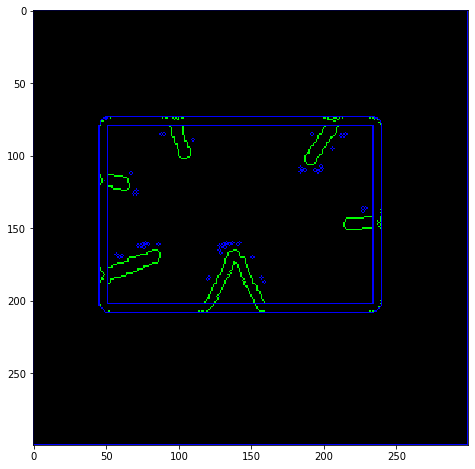

In [29]:
plt.figure(figsize=(8, 8));
plt.imshow(drawing[:,:,::-1])
plt.show()

### Bounding a contour

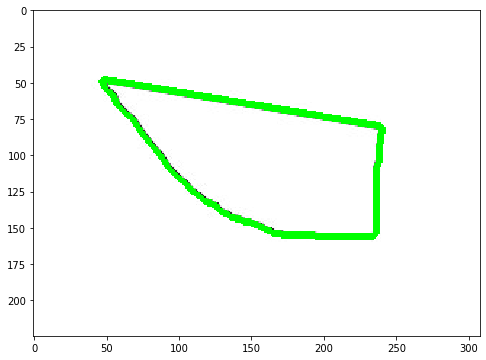

In [31]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter6/contour2.jpg", 0);



# Change thresholding and check
#ret,thresh = cv2.threshold(imgray,127,255,0)
ret,thresh = cv2.threshold(img,127,255,0)
#ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);


# drawing contours over original image
img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.drawContours(img_with_contours, contours, 1, (0,255,0), 3); # Talk about (0, 255, 0) colors


plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()


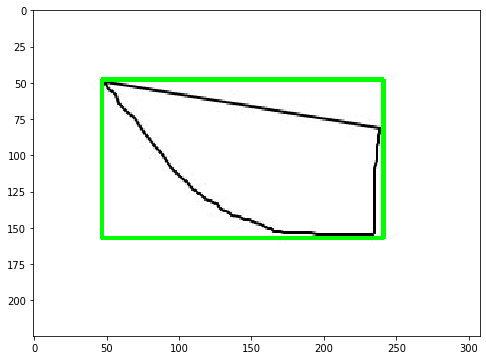

In [32]:
# Straight rectangle
cnt = contours[1]


#################FOCUS#############################
x,y,w,h = cv2.boundingRect(cnt)
###################################################






img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.rectangle(img_with_contours,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

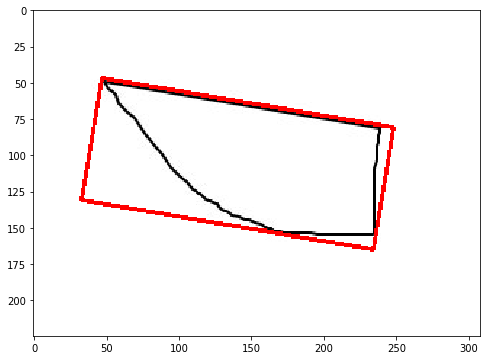

In [33]:
# Rotated rectangle

cnt = contours[1]

#######################FOCUS#########################
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
#######################################################



img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.drawContours(img_with_contours,[box],0,(0,0,255),2)

plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

108


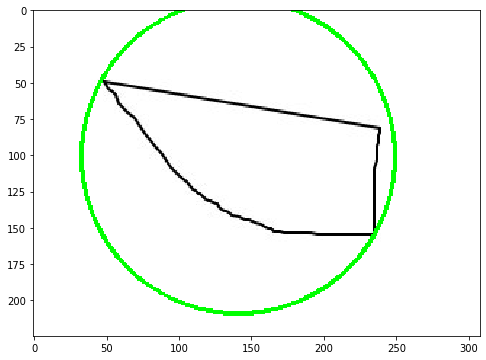

In [34]:
# Circular bounding

cnt = contours[1]

###############################FOCUS##############################
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
print(radius)
##################################################################




img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.circle(img_with_contours, center, radius,(0,255,0),2)

plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

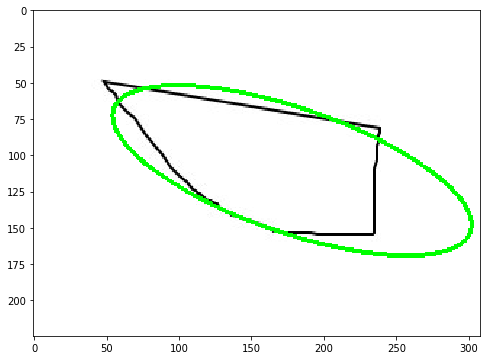

In [35]:
# Elliptical bounding

#########################FOCUS########################################
cnt = contours[1]
ellipse = cv2.fitEllipse(cnt)
######################################################################





img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.ellipse(img_with_contours,ellipse,(0,255,0),2)

plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

<a id='2'></a>
# Project - Find extreme points in image containing hand

## credits - https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/

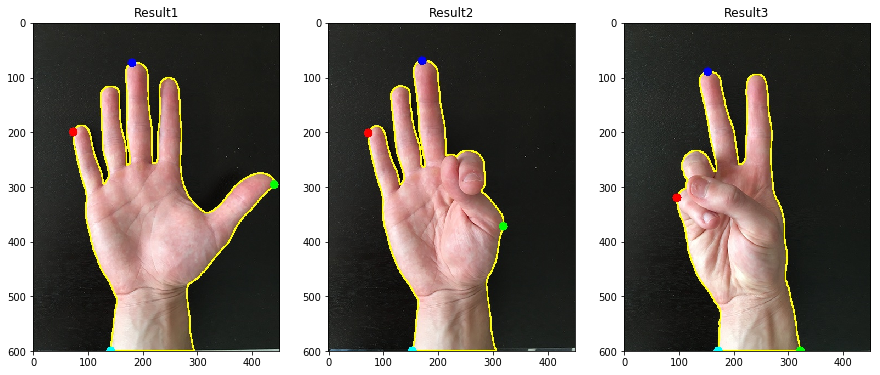

In [58]:


# Finding extreme points on contour of hands
import numpy as np
import cv2

# load the image, convert it to grayscale, and blur it slightly
img1 = cv2.imread("out1.jpg")
img2 = cv2.imread("out2.jpg")
img3 = cv2.imread("out3.jpg")


f = plt.figure(figsize=(15,15))
f.add_subplot(1, 3, 1).set_title('Result1');
plt.imshow(img1[:,:,::-1]);
f.add_subplot(1, 3, 2).set_title('Result2');
plt.imshow(img2[:,:,::-1]);
f.add_subplot(1, 3, 3).set_title('Result3');
plt.imshow(img3[:,:,::-1]);
plt.show();

In [ ]:
# import the necessary packages
import imutils
import cv2
 
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("hand_01.png") #Could be changed to hand_02.png or hand_03.png


In [ ]:
# STEP - 1: Comvert image to grayscale and store result in variable named gray
gray = 



# STEP - 2: Apply gaussian blur on the gray with kernel size 5 and sigma value 0. 
#         : Store result in the same variable
gray = 


# STEP - 3: Apply simple thresholding on gray
# Threshold value - 45
# Maxval - 25
# Method - Binary Threshold
thresh = 



# STEP - 4: Apply Erosion operation on thresh with kernal value as None
# Apply it for 2 iterations
# Store result back in variable thresh
thresh = 



# STEP - 5: Apply Dilation operation on thresh with kernal value as None
# Apply it for 2 iterations
# Store result back in variable thresh
thresh = 


 
# STEP - 6: Apply OpenCV find contours operation on thresh
# Method - External Retrieval Hierarchy
# Approximation - Chain simple    
cnts = 


# STEP - 7: Google search what imutils.grab_contours function does
cnts = imutils.grab_contours(cnts)



# STEP - 8: Find the contour which has maximum area
# Hint 1 - Can use for loop to search which contour has max area
# Hint 2 - Could try using Python max function with appropriate key value
c = 


# STEP - 9: determine the most extreme points along the contour "c"
# HINT - Examine the contour "c" variable and understand what all it contains. (USe OpenCV's documentation)
# Extrement left coordinates
extLeft = 
# Extreme right coordinates
extRight = 
# Extreme Top coordinates
extTop = 
# Extreme Bottom coordinates
extBot = 




In [ ]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2);
cv2.circle(image, extLeft, 8, (0, 0, 255), -1);
cv2.circle(image, extRight, 8, (0, 255, 0), -1);
cv2.circle(image, extTop, 8, (255, 0, 0), -1);
cv2.circle(image, extBot, 8, (255, 255, 0), -1);

In [ ]:
plt.figure(figsize=(8, 8));
plt.imshow(image[:,:,::-1])
plt.show()

<a id='3'></a>
# Project - Contour based shape detection

## credits - https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/

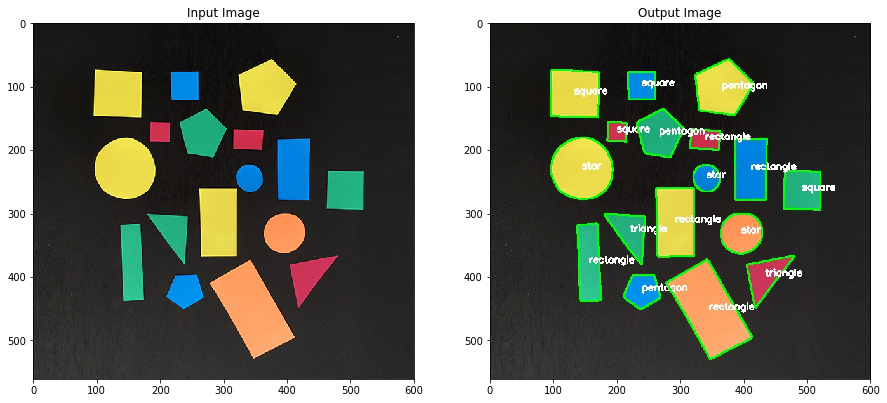

In [59]:

# OpenEnded Project on contour based shape detection
# Use everything that is taught to display shapes of each object in "detect_shapes.png"
# Expected Input is

import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread("detect_shapes.png")
img2 = cv2.imread("shapes_detected_output.jpg")


f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input Image');
plt.imshow(img1[:,:,::-1]);
f.add_subplot(1, 2, 2).set_title('Output Image');
plt.imshow(img2[:,:,::-1]);



In [ ]:
#Hints
# - Use cv2.approxPolyDP to estimate shapes
# - Remember len() operator on output of cv2.approxPolyDP gives vertices in the approximation
# - If more than 10 vertices then circle